In [1]:
# load in the correct modules
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import tqdm
import cmasher as cm
from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)
import warnings
warnings.filterwarnings('ignore')
import jax
from scipy import stats
import matplotlib.gridspec as grid
from matplotlib.colors import LogNorm

In [2]:
# LOAD THE DATA
path = '/Users/dhortadarrington/Documents/Master/data/allstar-dr17-StarHorse-Gaiadr3'
tb = fits.open(path)
data = tb[1].data 

In [3]:
# LOAD THE DATA FOR THE GC LIST IN APOGEE
path = '/Users/dhortadarrington/Documents/Master/data/'
file = 'GC_catalogo_14_mayo.fits'
# file = 'GC_DR16plus_nofeh.fits'

tb2 = fits.open(path+file)
data2 = tb2[1].data
gc_star_ids = data2.field('APOGEE_ID')
print('There are '+str(len(gc_star_ids))+' GC stars')

# LOAD THE DATA FOR THE GC LIST IN APOGEE
path = '/Users/dhortadarrington/Documents/Master/data/'
file = 'GC_members_VAC.fits'
# file = 'GC_DR16plus_nofeh.fits'

tb3 = fits.open(path+file)
data3 = tb3[1].data
gc_star_ids_RPS = data3.field('APOGEE_ID')
print('There are '+str(len(gc_star_ids_RPS))+' GC stars')

There are 7562 GC stars
There are 7260 GC stars


In [4]:
apo_id = data['APOGEE_ID']
# Clean the initial data
mask_gcs = np.isin(list(apo_id),list(gc_star_ids))
mask_gcs2 = np.isin(list(apo_id),list(gc_star_ids_RPS))

In [5]:
starflag_bits = np.array(
    [
        0,  # BAD_PIXELS
        1,  # COMMISSIONING
        3,  # VERY_BRIGHT_NEIGHBOR
        16,  # SUSPECT_RV_COMBINATION
        17,  # SUSPECT_BROAD_LINES
        19,  # RV_REJECT
        21,  # MULTIPLE_SUSPECT
        22,  # RV_FAIL
    ]
)
starflag_bitmask = np.sum(2**starflag_bits)
starflag_mask = (data["STARFLAG"] & starflag_bitmask) == 0
starflag_mask.sum()

aspcapflag_bits = np.array(
    [
        23,  # STAR_BAD
    ]
)
aspcapflag_bitmask = np.sum(2**aspcapflag_bits)
aspcapflag_mask = (data["ASPCAPFLAG"] & aspcapflag_bitmask) == 0
aspcapflag_mask.sum()

536568

In [23]:
# create the parent mask
mask = (data['SNR']>50)&(data['LOGG']<3.5)&(data['LOGG']>1.)&(data['TEFF']>3500.)&(data['TEFF']<5500.)\
    &(mask_gcs==False)&(mask_gcs2==False)&(starflag_mask)&(aspcapflag_mask)&(data['ruwe']<1.4)&\
    (data['parallax']>0.2)&(data['parallax_over_error']>8.)&(data['FE_H']<-1)

print('There are '+str(len(data[mask]))+' stars in the parent sample')


There are 2477 stars in the parent sample


(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.960e+02, 1.374e+03,
        8.450e+02, 5.200e+01, 6.000e+00, 1.000e+00]),
 array([-8.59360977e+03, -7.16155918e+03, -5.72950858e+03, -4.29745799e+03,
        -2.86540740e+03, -1.43335680e+03, -1.30621107e+00,  1.43074438e+03,
         2.86279497e+03,  4.29484557e+03,  5.72689616e+03]),
 <BarContainer object of 10 artists>)

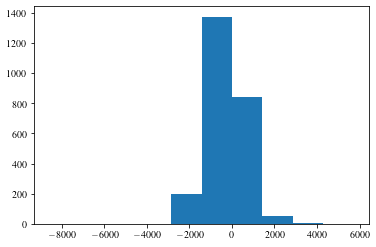

In [24]:
plt.hist(data['L'][:,2][mask])

274


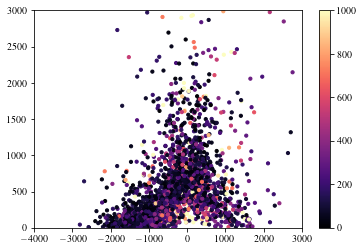

In [27]:
plt.scatter(data['L'][:,2][mask],data['actions'][:,0][mask],s=10,c=data['actions'][:,2][mask],cmap='magma',vmin=0,vmax=1000)
plt.xlim(-4000,3000)
plt.ylim(0,3000)
plt.colorbar()
mask_bar = (data['L'][:,2]<-1000)&(data['actions'][:,0]<200)&(data['actions'][:,2]<200)
print(len(data[mask&mask_bar]))

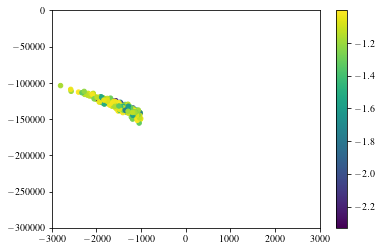

In [36]:
plt.scatter(data['L'][:,2][mask&mask_bar],data['E'][mask&mask_bar],s=20,c=data['FE_H'][mask&mask_bar])
plt.ylim(-3e5,0)
plt.xlim(-3e3,3e3)
plt.colorbar()


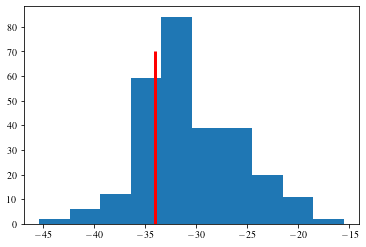

In [34]:
plt.hist(data['freqs'][:,1][mask&mask_bar])
plt.vlines(-34,0,70,lw=3,color='r')

(-0.2, 0.6)

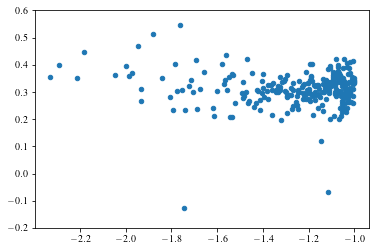

In [30]:
plt.scatter(data['FE_H'][mask&mask_bar],data['MG_FE'][mask&mask_bar],s=20)
plt.ylim(-0.2,0.6)

(-0.6, 0.6)

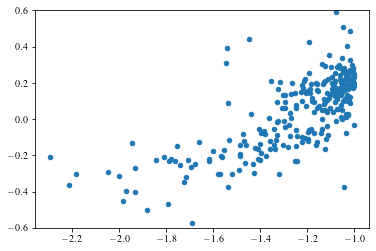

In [32]:
plt.scatter(data['FE_H'][mask&mask_bar],data['AL_FE'][mask&mask_bar],s=20)
plt.ylim(-0.6,0.6)